In [1]:
#!/bin/env python
#coding: utf-8

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data/', one_hot=True)

learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28

X = tf.placeholder(tf.float32, [None, n_input])

W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


Epoch: 0001 Avg. cost = 0.1990
Epoch: 0002 Avg. cost = 0.0582
Epoch: 0003 Avg. cost = 0.0459
Epoch: 0004 Avg. cost = 0.0401
Epoch: 0005 Avg. cost = 0.0359
Epoch: 0006 Avg. cost = 0.0341
Epoch: 0007 Avg. cost = 0.0323
Epoch: 0008 Avg. cost = 0.0312
Epoch: 0009 Avg. cost = 0.0295
Epoch: 0010 Avg. cost = 0.0282
Epoch: 0011 Avg. cost = 0.0277
Epoch: 0012 Avg. cost = 0.0274
Epoch: 0013 Avg. cost = 0.0272
Epoch: 0014 Avg. cost = 0.0269
Epoch: 0015 Avg. cost = 0.0265
Epoch: 0016 Avg. cost = 0.0261
Epoch: 0017 Avg. cost = 0.0251
Epoch: 0018 Avg. cost = 0.0247
Epoch: 0019 Avg. cost = 0.0246
Epoch: 0020 Avg. cost = 0.0243
Optimization Complete!


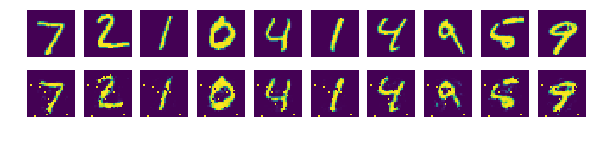

In [2]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
	total_cost = 0

	for i in range(total_batch):
		batch_xs, batch_ys = mnist.train.next_batch(batch_size)
		_, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})

		total_cost += cost_val

	print(
		'Epoch:', '%04d' % (epoch + 1),
		'Avg. cost =', '{:.4f}'.format(total_cost / total_batch)
	)

print('Optimization Complete!')

sample_size = 10

samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
	ax[0][i].set_axis_off()
	ax[1][i].set_axis_off()
	ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
	ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()